In [ ]:
# Core data science libraries
import pandas as pd
import numpy as np

# Model and preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Metrics and evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
train_df = pd.read_csv('alz_train.csv')
val_df = pd.read_csv('alz_validation.csv')
test_df = pd.read_csv('alz_test.csv')

# Display shape and check loading
print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)

Train: (1289, 34)
Validation: (430, 34)
Test: (430, 34)


In [ ]:
# Final selected features based on EDA + correlation
selected_features = [
    'MMSE', 'FunctionalAssessment', 'ADL',
    'MemoryComplaints', 'BehavioralProblems', 'Forgetfulness',
    'Confusion', 'Disorientation', 'DifficultyCompletingTasks', 'PersonalityChanges',
    'FamilyHistoryAlzheimers', 'Depression', 'HeadInjury',
    'Hypertension', 'CardiovascularDisease', 'Diabetes'
]

# Define X and y
X_train = train_df[selected_features]
y_train = train_df['Diagnosis']

X_val = val_df[selected_features]
y_val = val_df['Diagnosis']

X_test = test_df[selected_features]
y_test = test_df['Diagnosis']

In [ ]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform all datasets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train model
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

print("Model training complete.")

Model training complete.


In [ ]:
# Predict class labels (0 or 1)
y_val_pred = logreg.predict(X_val_scaled)

# Predict probabilities (for ROC curve and AUC)
y_val_prob = logreg.predict_proba(X_val_scaled)[:, 1]  # probabilities for class 1




# Apply custom threshold for classification
threshold = 0.3
y_val_pred_adj = (y_val_prob >= threshold).astype(int)

In [ ]:
print(f"Classification Report (Threshold = {threshold}):")
print(classification_report(y_val, y_val_pred_adj))

Classification Report (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       254
           1       0.71      0.80      0.75       176

    accuracy                           0.78       430
   macro avg       0.78      0.78      0.78       430
weighted avg       0.79      0.78      0.78       430



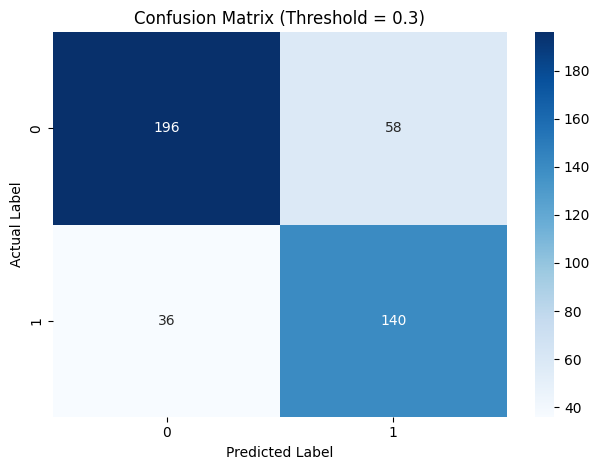

In [ ]:
# Confusion matrix
conf_matrix_adj = confusion_matrix(y_val, y_val_pred_adj)
sns.heatmap(conf_matrix_adj, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix (Threshold = {threshold})")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

AUC Score (Validation Set): 0.869


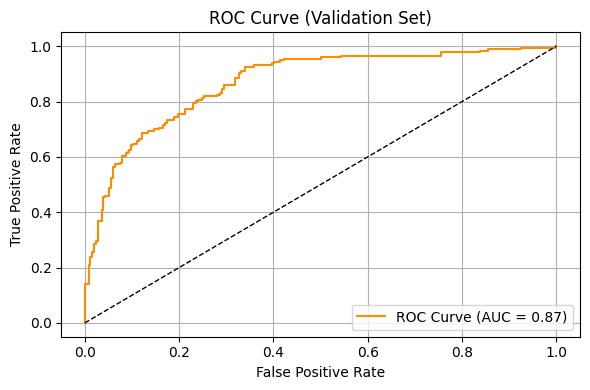

In [ ]:
# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Compute AUC score
auc_score = roc_auc_score(y_val, y_val_prob)
print(f"AUC Score (Validation Set): {auc_score:.3f}")

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Validation Set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-22-4b713783dfbf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='vlag')


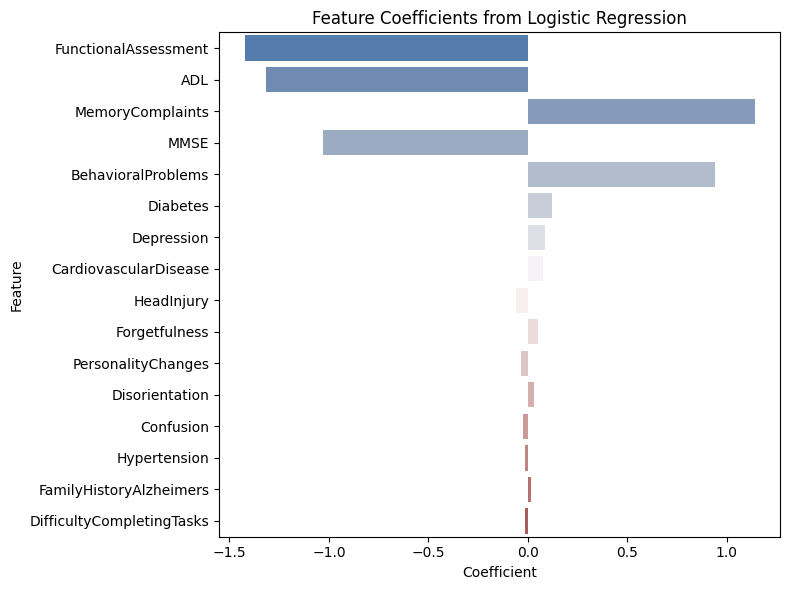

In [ ]:
# Display coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='vlag')
plt.title("Feature Coefficients from Logistic Regression")
plt.tight_layout()
plt.show()